# **Logistic Regression**
## **1. Perceptron Method**

In [105]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, 
                           n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

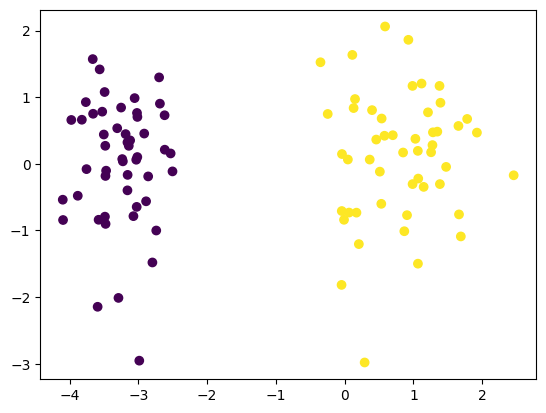

In [107]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [108]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1500):
        k = np.random.randint(0, 100)
        y_hat = step(np.dot(X[k], weights))
        weights = weights + lr * (y[k]-y_hat) * X[k]
    
    return weights[0], weights[1:]

In [109]:
def step(z):
    return 1 if z > 0 else 0

In [110]:
intercept_, coef_ = perceptron(X, y)

In [111]:
print(coef_)
print(intercept_)

[1.02733235 0.49043439]
1.2100000000000002


In [112]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [113]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

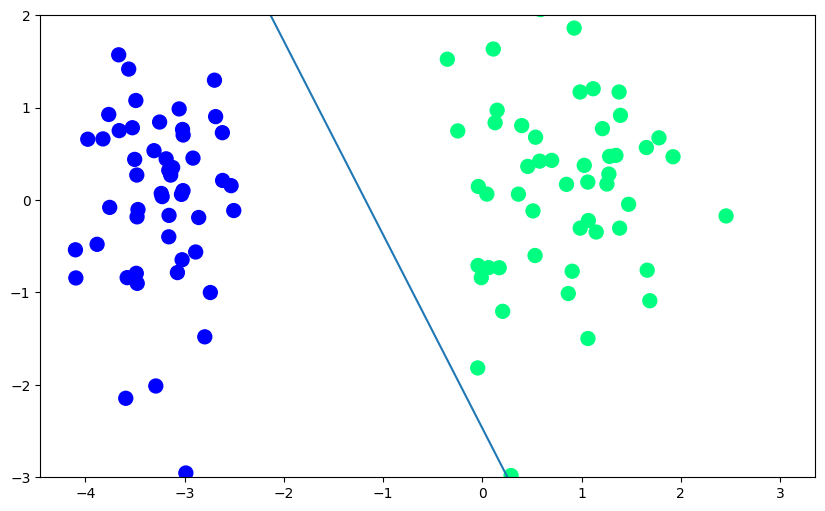

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

## **2. Scikit Learn**

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [117]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [118]:
x_input1 = np.linspace(-3, 3, 100)
y_input1 = m*x_input + b

(-3.0, 2.0)

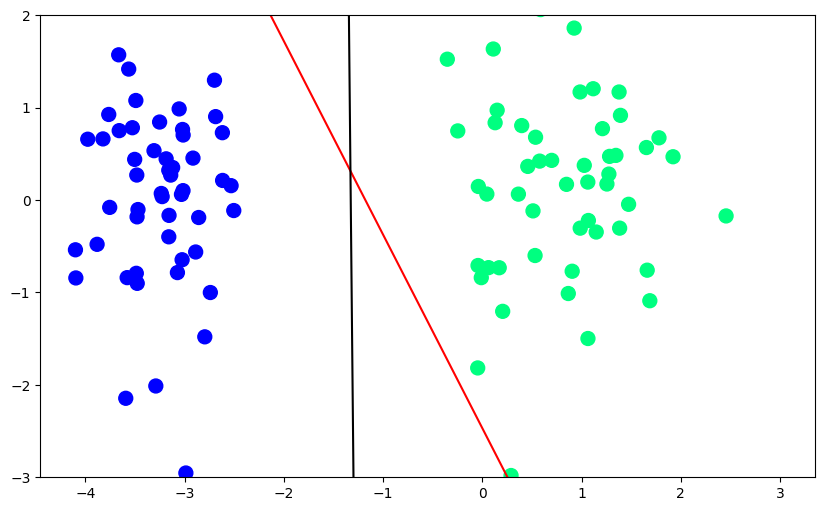

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red")
plt.plot(x_input1, y_input1, color="black")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)

### Change class_sep and note the difference.
1. The perceptron trick will stop where the data is rightly classified. Whereas, Logistic Regression will give the best ossible solution even after it has found the solution.
2. In perceptron trick, you do not get the best line.

## **3. Sigmoid Function**

In [120]:
def perceptron(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.01
    
    for i in range(1500):
        k = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[k], weights))
        weights = weights + lr * (y[k]-y_hat) * X[k]
    
    return weights[0], weights[1:]


In [121]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [122]:
intercept_, coef_ = perceptron(X, y)
print(coef_)
print(intercept_) 

[1.96077804 0.39185755]
1.5986484823746796


In [123]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [124]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m*x_input2 + b

(-3.0, 2.0)

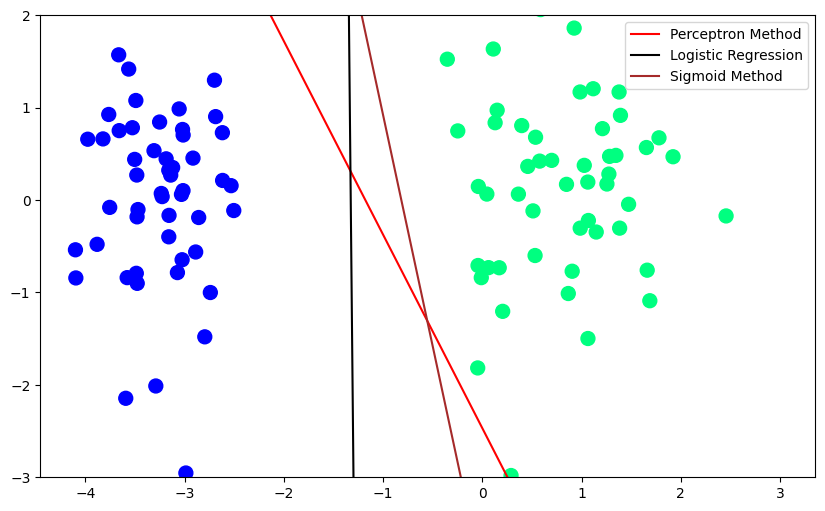

In [125]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", label="Perceptron Method")
plt.plot(x_input1, y_input1, color="black", label="Logistic Regression")
plt.plot(x_input2, y_input2, color="brown", label="Sigmoid Method")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.legend()
plt.ylim(-3, 2)

## **4. Log Loss Function using Gradient Descent**
(Batch Gradient Descent)

In [150]:
def gd(X, y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.15
    
    for i in range(7500):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr * (np.dot((y-y_hat), X) / X.shape[0])
    
    return weights[0], weights[1:]

In [151]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [152]:
intercept_, coef_ = gd(X, y)
print(coef_)
print(intercept_) 

[4.29304045 0.16629131]
5.044555476699916


In [153]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [154]:
x_input3 = np.linspace(-3, 3, 100)
y_input3 = m*x_input3 + b

(-3.0, 2.0)

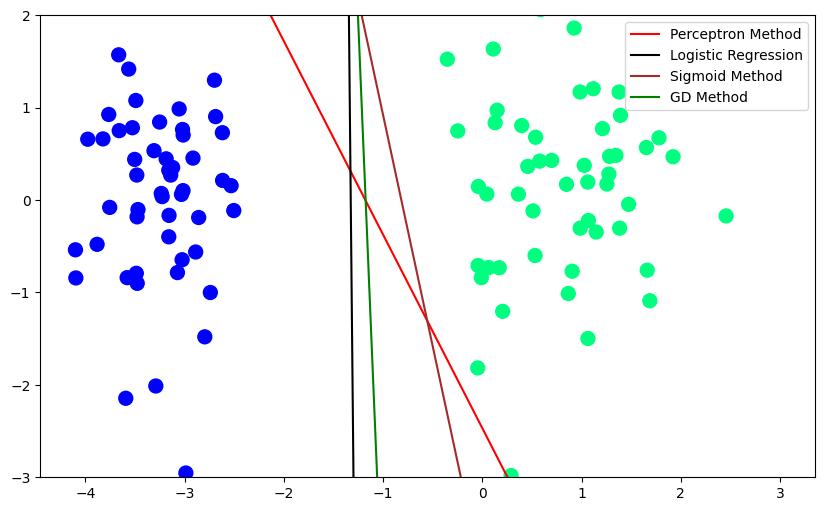

In [155]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", label="Perceptron Method")
plt.plot(x_input1, y_input1, color="black", label="Logistic Regression")
plt.plot(x_input2, y_input2, color="brown", label="Sigmoid Method")
plt.plot(x_input3, y_input3, color="green", label="GD Method")

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.legend()
plt.ylim(-3, 2)